<a href="https://colab.research.google.com/github/rasyidabdi/MachineLearningTask/blob/main/WeekUTS/Rasyid%20Abdi_1103204127_UTS-RANDOM-FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rasyid Abdi Gantoro

Nim : 1103204127

Dataset : https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Lecture : UTS

Model : Random Forest

Link Chat-GPT : https://chat.openai.com/share/4ebefc0a-3894-4cec-a5e9-4e08d5b39f06

**IMPORT LIBRARY YANG DIBUTUHKANt**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Menghubungkan google collab dengan drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Baca dan Tampilkan data


In [5]:
# Baca file .csv dari GDrive
train = pd.read_csv('/content/drive/MyDrive/DATASET/train.csv', dtype={'Column26': str})

# Tampilkan baris dari dataframe 'train'
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Bersihkan Data


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13524 non-null  object 
 1   Customer_ID               13524 non-null  object 
 2   Month                     13523 non-null  object 
 3   Name                      12182 non-null  object 
 4   Age                       13523 non-null  object 
 5   SSN                       13523 non-null  object 
 6   Occupation                13523 non-null  object 
 7   Annual_Income             13523 non-null  object 
 8   Monthly_Inhand_Salary     11477 non-null  float64
 9   Num_Bank_Accounts         13523 non-null  float64
 10  Num_Credit_Card           13523 non-null  float64
 11  Interest_Rate             13523 non-null  float64
 12  Num_of_Loan               13523 non-null  object 
 13  Type_of_Loan              11984 non-null  object 
 14  Delay_

konversi menjadi bilangan bulat

In [7]:
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)


train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)


train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)


train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)


train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)


train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)


def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0
train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

Menghitung duplikat yang ada di dalam data frame

In [8]:
# Gunakan metode duplicated() untuk mengidentifikasi baris-baris yang duplikat
duplicates = train[train.duplicated()]

# Tampung jumlah baris yang duplikat menggunakan shape[0]
num_duplicates = duplicates.shape[0]

# Uji kondisi apakah jumlah duplikat sama dengan nol
if num_duplicates == 0:
    print("Tidak ada duplikat yang ditemukan.")
else:
    print("Terdapat", num_duplicates, "baris duplikat dalam dataframe.")


Tidak ada duplikat yang ditemukan.


Tahap Scalling Data


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,13524.0,125.855072,7.106658e+02,0.000000,25.000000,33.000000,42.000000,8.674000e+03
Annual_Income,13523.0,181315.378590,1.452888e+06,7006.520000,20051.920000,40198.960000,75650.040000,2.418881e+07
Monthly_Inhand_Salary,11477.0,4352.247567,3.218057e+03,355.208333,1683.101667,3325.341838,6155.640000,1.485593e+04
Num_Bank_Accounts,13523.0,17.776751,1.220085e+02,0.000000,3.000000,6.000000,7.000000,1.789000e+03
Num_Credit_Card,13523.0,23.724248,1.346395e+02,0.000000,4.000000,5.000000,7.000000,1.486000e+03
Interest_Rate,13523.0,73.291577,4.659773e+02,1.000000,7.000000,14.000000,20.000000,5.747000e+03
Num_of_Loan,13524.0,10.221902,5.851185e+01,0.000000,2.000000,3.000000,6.000000,1.485000e+03
Delay_from_due_date,13523.0,21.105894,1.454129e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,13524.0,26.530908,1.987615e+02,0.000000,8.000000,13.000000,18.000000,4.241000e+03
Changed_Credit_Limit,13524.0,10.053520,6.851728e+00,-6.480000,4.940000,9.130000,14.342500,3.583000e+01


Menghilangkan outlier dalam dataframe

In [10]:
# Pilih kolom tertentu
selected_columns_train = train[['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']]

# Tentukan persentil untuk setiap kolom yang dipilih
percentile_threshold = 0.98
percentiles = selected_columns_train.quantile(percentile_threshold)

# Hapus perulangan nilai untuk setiap kolom yang masih diatas persentil yang ditentukan sebelumnya
for column in selected_columns_train.columns:
    train = train[train[column] <= percentiles[column]]


Hasil dari scalling tidak ada data yang outlier

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11612.0,125.227868,703.978694,14.000000,25.000000,33.000000,42.000000,8662.000000
Annual_Income,11612.0,51129.770211,36974.377961,7006.520000,19974.141250,39242.580000,73085.960000,163380.760000
Monthly_Inhand_Salary,9856.0,4276.333521,3087.643245,355.208333,1683.101667,3303.696667,6088.586667,13743.053333
Num_Bank_Accounts,11612.0,5.312435,2.609855,0.000000,3.000000,6.000000,7.000000,10.000000
Num_Credit_Card,11612.0,5.949621,9.224973,0.000000,4.000000,5.000000,7.000000,249.000000
Interest_Rate,11612.0,14.461505,9.894569,1.000000,7.000000,13.000000,20.000000,232.000000
Num_of_Loan,11612.0,7.075611,18.341758,0.000000,2.000000,3.000000,6.000000,100.000000
Delay_from_due_date,11612.0,21.062435,14.431654,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,11612.0,12.151051,6.909002,0.000000,8.000000,13.000000,18.000000,25.000000
Changed_Credit_Limit,11612.0,10.082801,6.836265,-6.310000,4.950000,9.190000,14.492500,35.830000


Menghilangkan Variable tidak jelas yang berada pada kolom Payment Behavior

In [12]:
# Hilangkan nilai '!@9#%8' pada kolom Payment_Behaviour
train = train[train['Payment_Behaviour'] != '!@9#%8']

# Hilangkan nilai '_______' pada kolom Occupation
train = train[train['Occupation'] != '_______']

# Cetak nilai unik dari kolom Occupation setelah penghapusan dilakukan
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [13]:
# dataframe baru pada Credit_Mix yang tidak ada nilai '_'
train = train[train['Credit_Mix'] != '_']

# Cetak nilai unik pada kolom Credit_Mix
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


Nilai Negatif

In [14]:
# Seleksi kolom untuk filtering
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

# Lakukan perulangan untuk selain kurang dari 0 dihapus dari dataframe
for column in selected_columns:
    train = train[train[column] >= 0]


In [15]:
# Drop daftar yang diinginkan
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop columns tersebut
train.drop(columns=columns_to_drop, inplace=True)

Nilai yang hilang/missing values

In [16]:
# Periksa total jumlah data yang kosong dalam dataframe
total_missing_values = train.isnull().sum().sum()

# Lakukan pengujian kondisional
if total_missing_values == 0:
    print("Tidak ada data yang kosong")
else:
    print("Jumlah data yang kosong :", total_missing_values)

Tidak ada data yang kosong


**Feature Engineering**

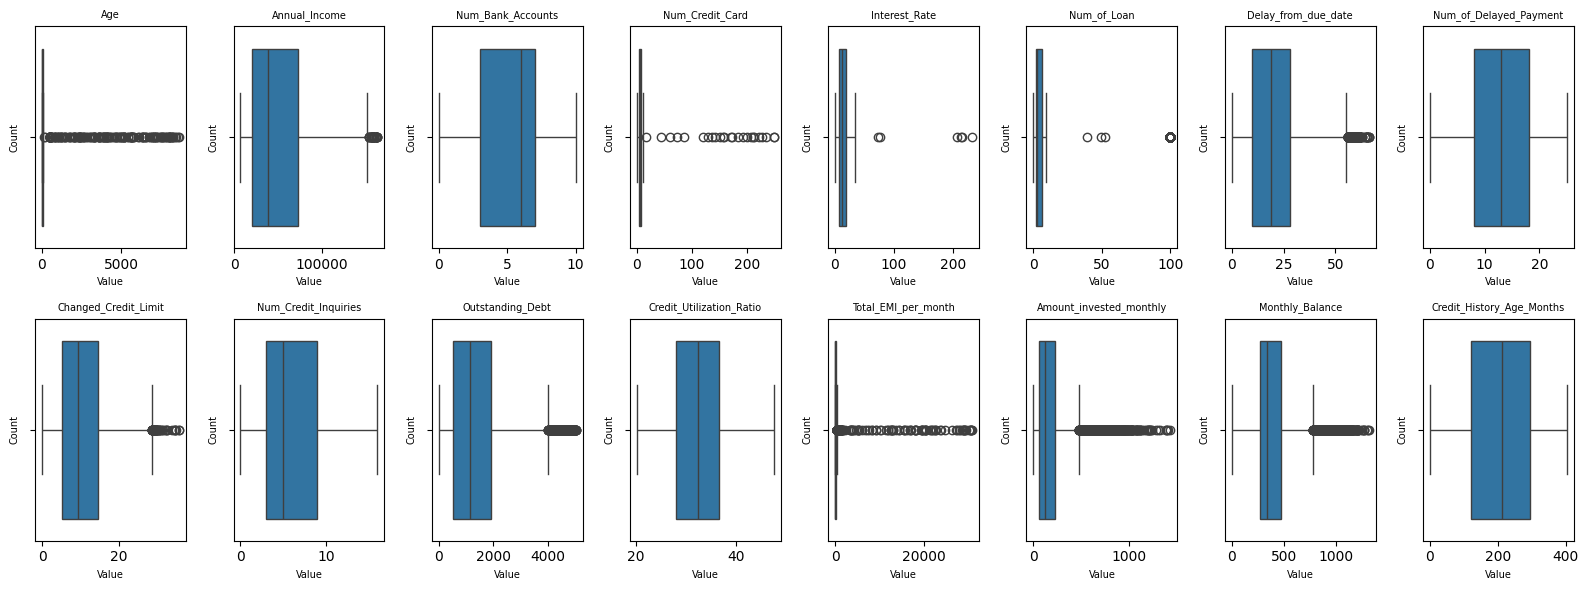

In [17]:
# Identifikasi jenis-jenis tipe data dan dimasukkan kedalam numerik kolom
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# Sembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Tata ulang tata letak plot
plt.tight_layout()

# Tampilkan Plot
plt.show()

Scalling dataframe dengan batasan tertentu

In [18]:
# Tune scale pada tiap kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

Encoding

In [19]:
#Label Encoder
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

# Encoding Occupation
label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

#Ordinal Encoder
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])


#Dropping Unencoded Columns
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

New Features

In [20]:
# Hitung total jumlah (Bank Accounts + Credit Cards)
train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Hitung total jumlah hutang per akun

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Hitung perbandingan hutang dan pemasukan

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Hitung total jumlah pembayaran yang telat per akun

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Hitung pengeluaran bulanan (EMI + Investasi bulanan)

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']


Mutual Information Scores (MI Score)​

In [21]:
# Identifikasi kolom-kolom kategorikal dalam DataFrame 'train'
categorical_columns = train.select_dtypes(include=['object']).columns

# Buat salinan data 'train' untuk proses encoding
data_encoded = train.copy()

# Buat encoder Ordinal
encoder = OrdinalEncoder()

# Lakukan encoding pada kolom-kolom kategorikal menggunakan encoder Ordinal
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Pisahkan target (y) dan fitur-fitur (X) dari data yang telah diencode
y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

# Hitung skor informasi mutual antara setiap fitur dalam X dan target y
mi_scores = mutual_info_classif(X, y)

# Cetak skor informasi mutual untuk setiap fitur
for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.02993379716892175
Feature 'Annual_Income': Mutual Information Score = 0.458061755951644
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.050163906155554994
Feature 'Num_Credit_Card': Mutual Information Score = 0.060080228607781505
Feature 'Interest_Rate': Mutual Information Score = 0.10937035730747113
Feature 'Num_of_Loan': Mutual Information Score = 0.01512763853224941
Feature 'Delay_from_due_date': Mutual Information Score = 0.0726023882475928
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05963692178868918
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.25671459527883744
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.035736276920988796
Feature 'Outstanding_Debt': Mutual Information Score = 0.46318620054261084
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.002520669113010632
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.0798450388113714
Feature 'Total_EMI_

In [22]:
# Urutkan skor informasi mutual dan nama fitur secara terbalik
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Dapatkan nama fitur yang sudah diurutkan
sorted_columns = [x[0] for x in sorted_mi_scores]

# Dapatkan skor informasi mutual yang sudah diurutkan
sorted_scores = [x[1] for x in sorted_mi_scores]

# Skala warna yang digunakan untuk plot
colorscale = 'Viridis'

# Buat plot batang dengan menggunakan skor informasi mutual dan nama fitur
fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Skor Informasi Mutual', len=0.5, y=0.2)))])

# Sesuaikan tata letak plot dan memberi judul pada sumbu-sumbunya
fig.update_layout(title='Skor Informasi Mutual untuk Setiap Fitur',
                  xaxis_title='Fitur',
                  yaxis_title='Skor Informasi Mutual')

# Menampilkan plot
fig.show()


Model Machine Learning

In [23]:

# Siapkan dataframe untuk latih pada variabel y pada kolom Credit_Score_Encoded
y = train['Credit_Score_Encoded']

# Siapkan dataframe untuk latih pada variabel X pada kolom yang ditentukan dibawah
X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Total_Num_Accounts',
       'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']]

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)


Random Forest

In [24]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

Mean Squared Error (MSE)

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.16870620310633214


Accuracy Test

In [26]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.7956989247311828

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       138
         1.0       0.82      0.83      0.83       490
         2.0       0.74      0.76      0.75       209

    accuracy                           0.80       837
   macro avg       0.78      0.77      0.78       837
weighted avg       0.80      0.80      0.80       837



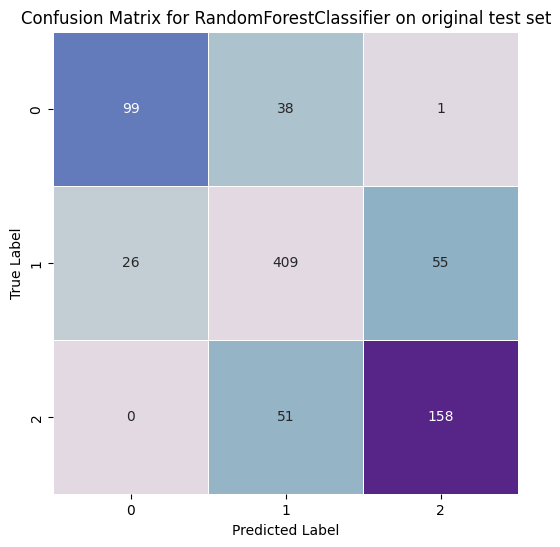

In [27]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))
